Nathan Mohapatra  
njmohapatra@ucdavis.edu

In [1]:
# Assignment-3 

# Guidelines:

# We will be using Python for coding. Please install Jupyter notebook (available in Anaconda Navigator) as a recommended editor tool.
# The homework should be submitted electronically through Canvas before the submission deadline.
# Hard Submission Deadline: 11:30 PM
# Late Submission is 0 credit.
# Plagiarism is a clear violation of honor code!
# Shared/copied code from any source is not allowed, as it is considered plagiarism.
# _ 0 for the corresponding assignment in the 1st attempt.
# _ F for the course in the 2nd attempt!

# Your submission should be a .ipynb file which contains the following:
# (a) a report in .ipynb format (use this label "report_HW2.ipynb") that includes your answers to all questions, plots, figures and any instructions to run your code,
# (b) the python code.

# Please pay attention to the following points:
# (a) do not include the files which are already provided to you for the assignment such as datasets,
# (b) each function should be written with the appropriate comments and documentation in the code so it is understandable.
# Please comment what your code does,and how a functionality is implemented
# (c) do not use any toolbox unless it is explicitly allowed in the homework description. 
# (d) If you have questions related to your assignment including coding questions, please contact your TAs as instructed in the syllabus video in the beginning of the quarter.

In [2]:
# Assignment Description:
# For this assignment, download “Churn” dataset that is available in the UCIMachine Learning Repository:
# Download the dataset from here: (  download)
# You will need to code your solution from scratch. Unless explicitly stated,
# it is fine to use open source code, for example, sci-kit learn, to help you write your own implementation# of the methods.

# Here is the description of the dataset:
# State: Categorical, for the 50 states and the District of Columbia
# Account Length: Integer-valued, how long account has been active
# Area code: Categorical
# Phone Number: Essentially a surrogate for customer ID
# International Plan: Dichotomous categorical, yes or no
# Voice Mail Plan: Dichotomous categorical, yes or no
# Number of Voice Mail Messages: Integer-valued
# Total Day Minutes: Continuous, minutes customer used service during the day
# Total Day Calls: Integer-valued
# Total Day Charge: Continuous, perhaps based on above two variables
# Total Eve Minutes: Continuous, minutes customer used service during the evening
# Total Eve Calls: Integer-valued
# Total Eve Charge: Continuous, perhaps based on above two variables
# Total Night Minutes: Continuous, minutes customer used service during the night
# Total Night Calls: Integer-valued
# Total Night Charge: Continuous, perhaps based on above two variables
# Total International Minutes: Continuous, minutes customer used service to make international calls
# Total International Calls: Integer-valued
# Total International Charge: Continuous, perhaps based on above two variables
# Number of Calls to Customer Service: Integer-valued
# Churn: Target. Indicator of whether the customer has left the company (True or False)

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import OneClassSVM

# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# read dataset into pandas dataframe
df = pd.read_csv('./../datasets/churn.txt', sep=',')
df.columns = ['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']
df = df.drop(columns='Phone') # drop phone number column
df.head()

,State,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 1: [50 pts]
Allowed libraries: seaborn, matplotlib, pandas, sklearn

### Part a) [20 pts]
Normalize the numerical variables, encode the categorical variables (you can use label encoding, or one-hot encoding for categorical variables: https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 (Links to an external site.)
Identify outliers and remove them from the dataset. The training data contains outliers that are defined as samples that are far from the others. With outlier detection, the goal is to fit the regions where the training data is the most concentrated, ignoring the deviant observations. Use any two outlier detection algorithms (e.g. one-class SVM, LOF, Isolation Forest, etc.) and perform at least two of the methods to the churn dataset. (https://scikit-learn.org/stable/modules/svm.html (Links to an external site.)

### Hints:

#### Goals:  
- Preprocessing of dataset  
- Normalization of numerical variables  
- Encoding of categorical variables

#### Stretch Goals:  
- Exploratory data analysis (e.g., characterization of class balance, descriptive statistics)

#### Conditions:  
- Must apply a transformation to numerical variables  
- Can be MinMaxScaler or similar (eg. StandardScaler)  
- Must convert default type of Area Code to object/string/categorical  
- Must encode all categorical variables  
- Expecting one hot encoding  
- May use any method to achieve this (get_dummies, OneHotEncoder, etc.)  
- Sklearn.preprocessing.MinMaxScaler + pandas.get_dummies  
- Sklearn.preprocessing.MinMaxScaler + Sklearn.preprocessing.OneHotEncoder

#### Pipelined:  
- Sklearn.preprocessing.MinMaxScaler + Sklearn.preprocessing.OneHotEncoder  
- May use a pipeline for transformation

### Encode categorical variables

In [5]:
# encode categorical variables (one hot encoding)
ohe = OneHotEncoder(sparse=False)
ohe_state = ohe.fit_transform(df[['State']])
ohe_area_code = ohe.fit_transform(df[['Area Code']])

# encode dichotomous categorical variables
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)

# target variable is boolean
df.replace('True.', 1, inplace=True)
df.replace('False.', 0, inplace=True)

In [6]:
# one hot encoding of 'state' variable
ohe_state

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
ohe_state.shape

(3333, 51)

In [8]:
# one hot encoding of 'area_code' variable
ohe_area_code

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [9]:
ohe_area_code.shape

(3333, 3)

In [10]:
df = df.drop(columns='State') # drop state column
df = pd.get_dummies(df, columns=['Area Code']) # encode area code columns
df.head()

,Account Length,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Area Code_408,Area Code_415,Area Code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,0,1,0


### Find outliers using 2 methods

In [11]:
# Method 1: One Class SVM
detector1 = OneClassSVM(nu=0.05)
predicted1 = detector1.fit_predict(df)
pd.crosstab(predicted1, columns=['count'])

col_0,count
row_0,
-1,168
1,3165


In [12]:
# Method 2: Isolation Forest
detector2 = IsolationForest(n_jobs=-1)
predicted2 = detector2.fit_predict(df)
pd.crosstab(predicted2, columns=['count'])

col_0,count
row_0,
-1,645
1,2688


In [13]:
# compare methods
svm_outcome = np.where(predicted1 == -1)
if_outcome = np.where(predicted2 == -1)
svm_if_intersection = np.intersect1d(svm_outcome, if_outcome)
print("SVM vs IF")
print(f"Size of intersection: {len(svm_if_intersection)}")

SVM vs IF
Size of intersection: 114


### Remove outliers

In [14]:
# remove SVM outliers
print(f"Size before dropping outlier(s): {len(df)}")
df_clean = df.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(df_clean)}")

Size before dropping outlier(s): 3333
Size after dropping outlier(s): 3165


### Split dataset for training and testing

In [15]:
# split dataset 70:30 for training and testing
X = df_clean.drop(columns='Churn')
Y = df_clean[['Churn']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Normalize training dataset

In [16]:
# normalize numerical variables (min-max normalization)
scaler = MinMaxScaler()
x_train['Account Length'] = scaler.fit_transform(x_train[['Account Length']])
x_train['VMail Message'] = scaler.fit_transform(x_train[['VMail Message']])
x_train['Day Mins'] = scaler.fit_transform(x_train[['Day Mins']])
x_train['Day Calls'] = scaler.fit_transform(x_train[['Day Calls']])
x_train['Day Charge'] = scaler.fit_transform(x_train[['Day Charge']])
x_train['Eve Mins'] = scaler.fit_transform(x_train[['Eve Mins']])
x_train['Eve Calls'] = scaler.fit_transform(x_train[['Eve Calls']])
x_train['Eve Charge'] = scaler.fit_transform(x_train[['Eve Charge']])
x_train['Night Mins'] = scaler.fit_transform(x_train[['Night Mins']])
x_train['Night Calls'] = scaler.fit_transform(x_train[['Night Calls']])
x_train['Night Charge'] = scaler.fit_transform(x_train[['Night Charge']])
x_train['Intl Mins'] = scaler.fit_transform(x_train[['Intl Mins']])
x_train['Intl Calls'] = scaler.fit_transform(x_train[['Intl Calls']])
x_train['Intl Charge'] = scaler.fit_transform(x_train[['Intl Charge']])
x_train['CustServ Calls'] = scaler.fit_transform(x_train[['CustServ Calls']])

x_train.head()

,Account Length,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Area Code_408,Area Code_415,Area Code_510
2825,0.439462,0,0,0.00,0.313692,0.355556,0.313622,0.540531,0.710526,0.540584,0.269982,0.753521,0.270142,0.715,0.473684,0.714815,0.222222,0,0,1
2739,0.448430,0,1,0.18,0.423917,0.637037,0.423940,0.522249,0.717105,0.522321,0.253641,0.225352,0.253555,0.540,0.473684,0.540741,0.000000,0,0,1
680,0.515695,0,0,0.00,0.525823,0.444444,0.525897,0.452570,0.697368,0.452516,0.490586,0.352113,0.490521,0.655,0.105263,0.655556,0.111111,0,0,1
1997,0.412556,0,0,0.00,0.790988,0.666667,0.790987,0.246637,0.473684,0.246753,0.348490,0.211268,0.348341,0.655,0.315789,0.655556,0.333333,0,1,0
1194,0.210762,0,0,0.00,0.522010,0.244444,0.522023,0.370128,0.506579,0.370130,0.490231,0.267606,0.490521,0.660,0.105263,0.659259,0.111111,0,0,1


### Part b) [30 pts] 
Answer the following questions:

### Hints:

#### Goals:  
- Understand how outlier detection can be used  
- Understand the key assumptions for a given algorithm

#### Conditions:
- Must apply at least two algorithms  
- Must compare outliers between the two algorithms  
- Must give some explanation of why these algorithms agree/differ on results  
    - Wide range of answers accepted  
    - Best explanations will answer question: "Why is this outlier detection (not) suitable for my data and task?" 
- Must explain assumptions for each method  
    - This is similar to the prior condition in that, if we know the assumptions, then we would have a good explanation of the difference in results  
    - Wide range of answers accepted  
- Must remove outliers (if any)  
    - This may be using a single method  
    - Or it may be using the intersection of multiple methods  
- Must remove a reasonable portion of the dataset or not?  
    - I describe reasonable as <10%. More than that and we have to ask the question, are these really outliers or just the tail of our population? Pretend it's a boxplot, we would want the dots outside of the whiskers, not the an entire quartile of data.  
    - Might remove few or no samples.  
- The outcome is an extremely important feature and we would expect there to be two clusters - one around each label. So if we drop the outcome feature then we should expect to have more outliers since the observations are less likely to cluster cleanly. The remaining features in the dataset need to be strong enough to define the clusters.

- Some intuition about techniques for outlier detection:  
    - EllipticEnvelope (EE): Intuitively, this is probably a bad choice since the feature set is unlikely to be normally distributed and this is an assumption in that model.  
    - OneClassSVM: This model requires us to give it an expected outlier percentage to identify. We don't know how many outliers there are, so as a discovery technique, this is probably a poor choice as well.  
    - For completeness, please calculate the intersection of the three techniques that returned results. The SVM vs EE and LOF vs SVM+EE.  
    - An example of removing the outliers for LOF as an example and for the sake of completeness:
        - print(f"Size before dropping outlier(s): {len(df_processed)}")
        - df_clean = df_processed.drop(lof_outcome[0])
        - print(f"Size after dropping outlier(s): {len(df_clean)}")

### (b-1) [10 pts]
#### Are there any outliers on the dataset?

### Must apply at least 2 algorithms

In [17]:
# Method 1: Elliptic Envelope
detector1 = EllipticEnvelope()
predicted1 = detector1.fit_predict(df)
pd.crosstab(predicted1, columns=['count'])

col_0,count
row_0,
-1,334
1,2999


In [18]:
# Method 2: One Class SVM
detector2 = OneClassSVM(nu=0.05)
predicted2 = detector2.fit_predict(df)
pd.crosstab(predicted2, columns=['count'])

col_0,count
row_0,
-1,168
1,3165


In [19]:
# Method 3: Local Outlier Factor
detector3 = LocalOutlierFactor(n_jobs=-1)
predicted3 = detector3.fit_predict(df)
pd.crosstab(predicted3, columns=['count'])

col_0,count
row_0,
-1,15
1,3318


Yes, the are outliers on the dataset.  
According to the Elliptic Envelope (EE) method, there are 334 outliers on the dataset.  
According to the One Class SVM (SVM) method, there are 168 outliers on the dataset.  
According to the Local Outlier Factor (LOF) method, there are 15 outliers on the dataset.

### (b-2) [10 pts]
#### Do the methods agree on the detected outliers and why?

### Must compare outliers between algorithms

In [20]:
# EE vs SVM intersection
ee_outcome = np.where(predicted1 == -1)
svm_outcome = np.where(predicted2 == -1)
ee_svm_intersection = np.intersect1d(ee_outcome, svm_outcome)
print("EE vs SVM")
print(f"Size of intersection: {len(ee_svm_intersection)}")

EE vs SVM
Size of intersection: 15


In [21]:
# LOF vs EE+SVM intersection
lof_outcome = np.where(predicted3 == -1)
lof__ee_svm_intersection = np.intersect1d(lof_outcome, ee_svm_intersection)
print("LOF vs EE+SVM")
print(f"Size of intersection: {len(lof__ee_svm_intersection)}")

LOF vs EE+SVM
Size of intersection: 2


No, the methods do not agree on the detected outliers, because they differ in their assumptions on the distribution of the inlying data, the sensitivity to outliers, the dimensionality of data, etc.

### (b-3) [10 pts] 
#### What are the assumptions behind each method? Remove any outliers (using a single method) and then continue with this new, revised dataset.

### Must remove outliers (a reasonable portion of dataset, if any)

In [22]:
# remove SVM outliers (< 10% of dataset)
print(f"Size before dropping outlier(s): {len(df)}")
df_clean = df.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(df_clean)}")

Size before dropping outlier(s): 3333
Size after dropping outlier(s): 3165


The Elliptic Envelope (EE) method assumes that the data is Gaussian and learns an ellipse.  
The One Class SVM (SVM) method assumes that data is independent and identically distributed.  
The Local Outlier Factor (LOF) method does not make any assumptions concerning the distribution of data.

### Part c) [20 pt] 
Plot a correlation matrix to identify the correlated variables in the revised churn dataset obtained from part b) (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 (Links to an external site.) and use seaborn library. Given that correlated features don't improve models, deal with the highly correlated variables by removing correlated features i.e., if you have two features that are highly correlated, you need to remove one. The reason for removing correlated features is to make the algorithm faster because less features means higher speed. Furthermore, removing highly correlated features decreases harmful bias in the final model.

### Hints:

#### Goals:  
- Explore data with correlation matrix  
- Drop multicollinear features

#### Stretch Goals:  
- Other EDA

#### Conditions:  
- Must generate a correlation plot  
    - This plot might be with all features (numerical + categorical)  
    - Or it might just be with numerical  
    - If it's just numerical, then how do you identify multicollinear features?  
- Must make observations about correlations  
- Must correctly identify mulitcollinearity  
    - Charge ~ Mins  
    - VMail Message ~ VMail Plan  
    - All binary features if they have both True + False  
- Must drop multicollinear features  
- Prior to modeling the data we need to check for feature correlation. This will help us identify feature importance and can inform what type of model to use.  
- Drop the useless variables and create a 2D correlation matrix (use heatmap from seaborn)  

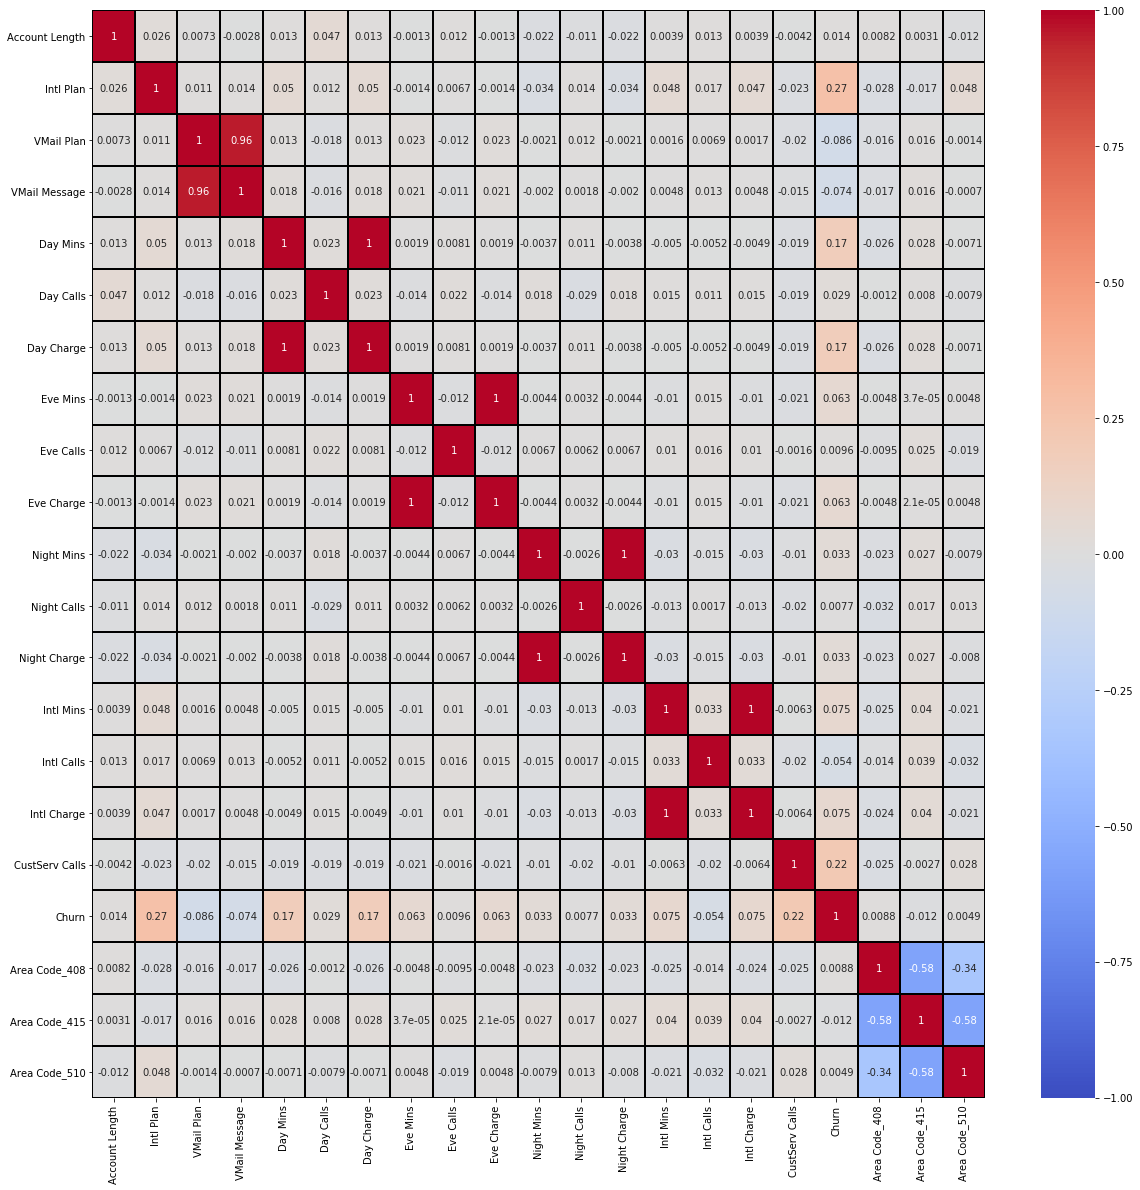

In [23]:
# create 2D correlation matrix plot
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1, linecolor='black')
plt.show()

### Remove strongly correlated (multicollinear) features

In [24]:
# 'VMail Plan' and 'VMail Message' (r = 0.96)
df_clean = df_clean.drop(columns='VMail Plan')
x_train = x_train.drop(columns='VMail Plan')
x_test = x_test.drop(columns='VMail Plan')

# 'Day Mins' and 'Day Charge' (r = 1)
df_clean = df_clean.drop(columns='Day Mins')
x_train = x_train.drop(columns='Day Mins')
x_test = x_test.drop(columns='Day Mins')

# 'Eve Mins' and 'Eve Charge' (r = 1)
df_clean = df_clean.drop(columns='Eve Mins')
x_train = x_train.drop(columns='Eve Mins')
x_test = x_test.drop(columns='Eve Mins')

# 'Night Mins' and 'Night Charge' (r = 1)
df_clean = df_clean.drop(columns='Night Mins')
x_train = x_train.drop(columns='Night Mins')
x_test = x_test.drop(columns='Night Mins')

# 'Intl Mins' and 'Intl Charge' (r = 1)
df_clean = df_clean.drop(columns='Intl Mins')
x_train = x_train.drop(columns='Intl Mins')
x_test = x_test.drop(columns='Intl Mins')

df_clean.head()

,Account Length,Intl Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn,Area Code_408,Area Code_415,Area Code_510
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,0,1,0
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,1,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0,1,0
5,118,1,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0,0,0,1


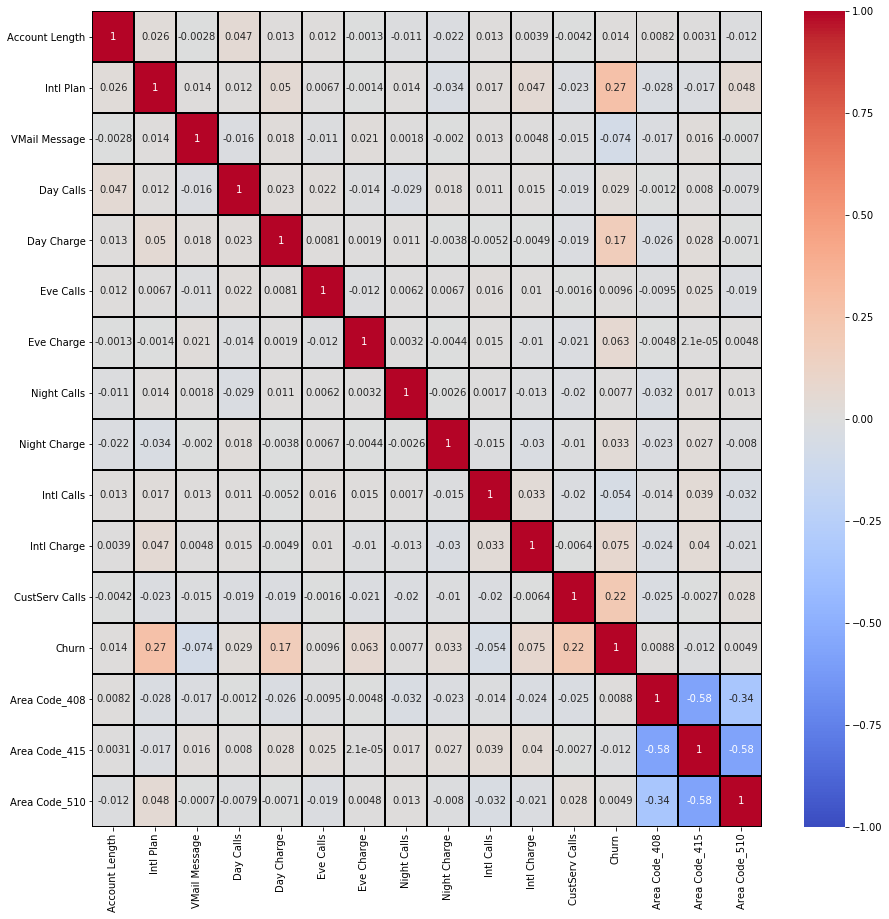

In [25]:
# create 2D correlation matrix plot
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1, linecolor='black')
plt.show()

### 2: [30 pts]
Allowed libraries: sklearn, pandas, Keras  and Tensorflow.  
https://keras.io/api/layers/activations/

### Part a) [15 pts] 
Use preprocessed churn dataset from Q1 to create a 4-layer artificial neural network (ANN) and specifically a feed-forwardmultilayer perceptron (with sigmoid activations and MSE loss function) to perform multi-class classification to classify 'Churn' based on other variables and describe the topology of the model (how many layers, how many neurons at each layer).

The variables of the datset are explained in the link provided above. Split the data into training and testing set by 70:30 and use the training set for training the model and the test set to evaluate the model performance. Please note that this is a binary classification problem so select the right number of nodes accordingly for the output layer. Also report precision and recall.

### Hints:

#### Goal:  
- To build a FF neural network classifier

#### Stretch Goals:  
- Use a hyperparameter search algorithm (grid search, wandb, etc.)  
- Recognize the need for a validation set for testing multiple neural network configurations

#### Conditions:  
- 70:30 train:test split  
    - Validation may split sets further  
- Either one good model or >1 models attempted  
    - Some justification for final model decision (recall, precision, etc.)  
- Must report precision and recall for best model  
    - Use reasonable threshold values  
    - Report both the test and training precision and recall  
- Must use sgd, have 2 hidden layers, single output layer, all layers must use sigmoid  
    - May use adam instead of sgd

In [26]:
# store model parameters (weights)
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[1].get_weights())

### Describe topology of model
The model is a 4-layer artificial neural network (ANN) and, specifically, a feedforward multilayer perceptron (MLP) that uses the sigmoid activation function and mean squared error (MSE) loss function to perform binary classification to classify the target 'Churn' based on other features.

The model has 4 layers; the input layer has 15 neurons (number of features), the hidden layers both have 4 neurons, and the output layer has 1 neuron (binary classification).

The model will be optimized using the Adam optimization algorithms and evaluated using the following model evaluation metrics: accuracy, precision, and recall.

In [27]:
model1 = keras.Sequential()
# hidden layers
model1.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model1.add(layers.Dense(4, activation='sigmoid'))
# output layer
model1.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model1.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy',
                      keras.metrics.Precision(name='precision', thresholds=0.5),
                      keras.metrics.Recall(name='recall', thresholds=0.5)])

### Train model and evaluate model performance
Data has already been split 70:30 for training and testing

In [29]:
# train model
weights = []
result = model1.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=32, verbose=1, callbacks=[FitCallback()])

Epoch 1/150
47/47 [==============================] - 2s 21ms/step - loss: 0.1444 - accuracy: 0.8446 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1244 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.8534 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1188 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.8532 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1159 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.8463 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1145 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
47/47 [========================

47/47 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.8567 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1003 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.8527 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1002 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.8548 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1001 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 72/150
47/47 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.8551 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0998 - val_accuracy: 0.8714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 73/150
47/47 [==============================] -

47/47 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.8636 - precision: 0.6626 - recall: 0.2366 - val_loss: 0.0971 - val_accuracy: 0.8714 - val_precision: 0.5000 - val_recall: 0.1383
Epoch 142/150
47/47 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.8727 - precision: 0.5182 - recall: 0.2349 - val_loss: 0.0972 - val_accuracy: 0.8728 - val_precision: 0.5185 - val_recall: 0.1489
Epoch 143/150
47/47 [==============================] - 0s 8ms/step - loss: 0.1058 - accuracy: 0.8548 - precision: 0.5511 - recall: 0.2379 - val_loss: 0.0972 - val_accuracy: 0.8728 - val_precision: 0.5185 - val_recall: 0.1489
Epoch 144/150
47/47 [==============================] - 0s 7ms/step - loss: 0.1050 - accuracy: 0.8530 - precision: 0.5837 - recall: 0.2070 - val_loss: 0.0971 - val_accuracy: 0.8714 - val_precision: 0.5000 - val_recall: 0.1383
Epoch 145/150
47/47 [==============================] - 0s 6ms/step - loss: 0.0987 - accuracy: 0.8586 - precision: 

In [30]:
# evaluate model performance 
model1.evaluate(x_test, y_test)

30/30 [==============================] - 0s 4ms/step - loss: 0.1090 - accuracy: 0.8611 - precision: 0.2381 - recall: 0.0413  


[0.10904491692781448,
 0.8610526323318481,
 0.2380952388048172,
 0.041322313249111176]

The dataset is class-imbalanced (majority of samples have value 0 for target 'Churn'). Furthermore, the training set is normalized but the testing set is not. For these reasons, the values of the evaluation metrics (accuracy, precision, recall) are not reliable, as they change drastically, seemingly randomly, every time I restart the kernel and re-execute the whole notebook.

### Part b) [15 pts] 
Provide two plots:

1. The weight values per iteration for the last layer, 
2. Training and test error per iteration. Use stochastic gradient descent with back-propagation.

When reporting error, use the ratio of misclassified samples.

### Hints:

#### Goal:  
- Visual exploration of model while it converges

#### Conditions:  
- Expecting 1 graph with multiple lines: x-axis=iteration (batch), y-axis=weight values, n_lines=number of neurons in layer  
    - If there are many neurons (>20) in the last layer, it is acceptable if they only plot the first ~20 or the biases instead  
    - Last layer might either be interpretted as last hidden layer or the output layer  
- Expecting 1 graph with 2 lines: x-axis=iteration (batch), y-axis=error (1-accuracy), n_lines=2 (training + test) 
    - May use validation instead of test  
    - Might be loss, accuracy, or 1-accuracy  
    - Error might not converge

### Plot 1

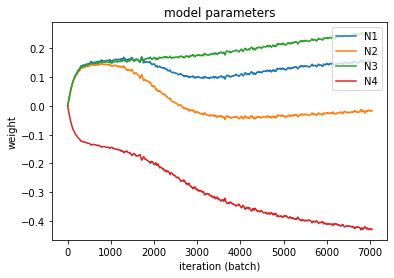

In [31]:
# weight values per iteration for last layer
plt.plot(pd.DataFrame([x[-1] for x in weights]))
plt.title('model parameters')
plt.xlabel('iteration (batch)')
plt.ylabel('weight')
plt.legend(['N1', 'N2', 'N3', 'N4'], loc='upper right') # each line is a neuron
plt.show()

### Plot 2

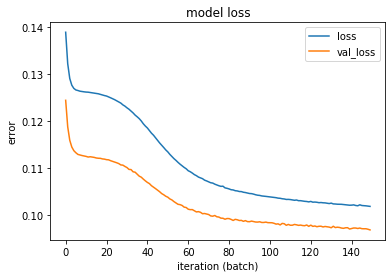

In [32]:
# training and testing error per iteration
plt.plot(result.history['loss']) # training error
plt.plot(result.history['val_loss']) # testing error
plt.title('model loss')
plt.xlabel('iteration (batch)')
plt.ylabel('error')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

### 3: [20 pts]
Now re-train the ANN with all your data (all samples). What is your training error?

### Hint:

#### Goal:  
- To develop an understanding between model size and training size

#### Stretch Goals:  
- Recognize the need for a validation set

#### Conditions:  
- Must reset weights prior to re-training  
- Train on all data  
    - Validation may split sets further  
- Must use sgd, have 2 hidden layers, single output layer, all layers must use sigmoid  
    - May use adam instead of sgd  
- Must report precision and recall  
    - Only expect training since we don't have a test set  
    - Might report validation in addition to training

### Normalize entire dataset (training set)

In [33]:
# normalize numerical variables (min-max normalization)
df_clean['Account Length'] = scaler.fit_transform(df_clean[['Account Length']])
df_clean['VMail Message'] = scaler.fit_transform(df_clean[['VMail Message']])
df_clean['Day Calls'] = scaler.fit_transform(df_clean[['Day Calls']])
df_clean['Day Charge'] = scaler.fit_transform(df_clean[['Day Charge']])
df_clean['Eve Calls'] = scaler.fit_transform(df_clean[['Eve Calls']])
df_clean['Eve Charge'] = scaler.fit_transform(df_clean[['Eve Charge']])
df_clean['Night Calls'] = scaler.fit_transform(df_clean[['Night Calls']])
df_clean['Night Charge'] = scaler.fit_transform(df_clean[['Night Charge']])
df_clean['Intl Calls'] = scaler.fit_transform(df_clean[['Intl Calls']])
df_clean['Intl Charge'] = scaler.fit_transform(df_clean[['Intl Charge']])
df_clean['CustServ Calls'] = scaler.fit_transform(df_clean[['CustServ Calls']])

df_clean.head()

,Account Length,Intl Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn,Area Code_408,Area Code_415,Area Code_510
0,0.566964,0,0.490196,0.592593,0.792911,0.557692,0.473705,0.408451,0.639344,0.15,0.500000,0.111111,0,0,1,0
1,0.473214,0,0.509804,0.688889,0.442453,0.583333,0.467282,0.492958,0.672131,0.15,0.685185,0.111111,0,0,1,0
2,0.607143,0,0.000000,0.622222,0.719434,0.628205,0.213569,0.500000,0.364382,0.25,0.609259,0.000000,0,0,1,0
4,0.330357,1,0.000000,0.614815,0.459777,0.705128,0.306303,0.619718,0.445604,0.15,0.505556,0.333333,0,0,1,0
5,0.522321,1,0.000000,0.503704,0.651732,0.570513,0.552790,0.598592,0.502981,0.30,0.314815,0.000000,0,0,0,1


Instead of resetting the weights of the previous model, I created a new but identical model...

In [34]:
model2 = keras.Sequential()
# hidden layers
model2.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model2.add(layers.Dense(4, activation='sigmoid'))
# output layer
model2.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model2.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy',
                      keras.metrics.Precision(name='precision', thresholds=0.5),
                      keras.metrics.Recall(name='recall', thresholds=0.5)])

### Train model

In [36]:
# train model
weights = []
result = model2.fit(df_clean.drop(columns='Churn'), df_clean['Churn'], validation_split=0.33, epochs=150, batch_size=32, verbose=1, callbacks=[FitCallback()])

Epoch 1/150
67/67 [==============================] - 3s 21ms/step - loss: 0.2255 - accuracy: 0.8635 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1988 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
67/67 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.8724 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1717 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
67/67 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.8769 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1537 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
67/67 [==============================] - 0s 3ms/step - loss: 0.1475 - accuracy: 0.8548 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1431 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
67/67 [========================

67/67 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.8731 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1152 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.8772 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1151 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/150
67/67 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.8681 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1148 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 72/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.8752 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1146 - val_accuracy: 0.8469 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 73/150
67/67 [==============================] -

Epoch 138/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.8726 - precision: 0.9014 - recall: 0.0426 - val_loss: 0.1074 - val_accuracy: 0.8469 - val_precision: 0.5000 - val_recall: 0.0063
Epoch 139/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.8754 - precision: 0.8430 - recall: 0.0372 - val_loss: 0.1076 - val_accuracy: 0.8469 - val_precision: 0.5000 - val_recall: 0.0063
Epoch 140/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.8897 - precision: 0.5980 - recall: 0.0087 - val_loss: 0.1073 - val_accuracy: 0.8469 - val_precision: 0.5000 - val_recall: 0.0063
Epoch 141/150
67/67 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.8720 - precision: 0.7142 - recall: 0.0336 - val_loss: 0.1074 - val_accuracy: 0.8469 - val_precision: 0.5000 - val_recall: 0.0063
Epoch 142/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.8684

In [37]:
print(f"My training error is {result.history['loss'][-1]}")

My training error is 0.09418009221553802
